In [ ]:
!pip install -q pandas==1.5.3

In [ ]:

# Imports
import pandas as pd
from pandas import DataFrame

print('Panda version:', pd.__version__)


In [ ]:

# Reading data
data = pd.read_csv("dados/dataset.csv")


In [ ]:
data.head()

In [31]:
# 1:Qual Cidade com Maior Valor de Venda de Produtos da Categoria 'Office Supplies'?    

somatorios = data[data.Categoria == 'Office Supplies'][['Cidade', 'Valor_Venda']].groupby(['Cidade']).sum()
# print(somatorios.sort_values(by='Valor_Venda', ascending=False))

cidadeComMaiorValorVenda = somatorios.query('Valor_Venda == Valor_Venda.max()')
print(cidadeComMaiorValorVenda)

               Valor_Venda
Cidade                    
New York City    68362.814
Los Angeles      47098.100
San Francisco    41771.198
Seattle          34856.878
Philadelphia     29313.687
...                    ...
Ormond Beach         2.808
Pensacola            2.214
Jupiter              2.064
Elyria               1.824
Abilene              1.392

[480 rows x 1 columns]
               Valor_Venda
Cidade                    
New York City    68362.814


In [ ]:
# R1:
data_p1 = data[data['Categoria'] == 'Office Supplies']
data_p1_total = data_p1.groupby('Cidade')['Valor_Venda'].sum()
# print(data_p1.groupby('Cidade')['Valor_Venda'].groups)

cidade_maior_venda = data_p1_total.idxmax()
print(cidade_maior_venda)

# Validando resultado
# data_p1_total.sort_values(ascending = False)

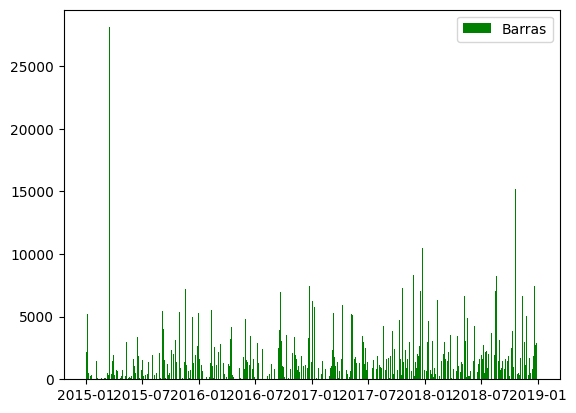

In [30]:
# 2:Qual o Total de Vendas Por Data do Pedido?Demonstre o resultado através de um gráfico de barras.    

import matplotlib.pyplot as plt
%matplotlib inline

data["Data_Pedido"] = data["Data_Pedido"].astype('datetime64[ns]')
total_vendas = data[['Data_Pedido', 'Valor_Venda']].groupby('Data_Pedido').sum()
total_vendas_ordered = total_vendas.sort_values(by='Data_Pedido', ascending=True)

plt.bar(total_vendas_ordered.index, total_vendas_ordered['Valor_Venda'].to_numpy(), label = 'Barras', color = 'green')
plt.legend()
plt.show()